# Determining knee point using ideas from [Finding a "Kneedle" in a Haystack: Detecting Knee Points in System Behavior](https://www1.icsi.berkeley.edu/~barath/papers/kneedle-simplex11.pdf)

Another example [here](https://github.com/saketkc/notebooks/blob/master/python/Kneedle%20Algorithm.ipynb)

In [1]:
%pylab inline
import scipy as sp
import seaborn as sns
from scipy.interpolate import UnivariateSpline
sns.set_style('white')

def draw_plot(X, Y, knee_point=None):
    plt.plot(X, Y)
    if knee_point:
        plt.axvline(x=knee_point, color='k', linestyle='--')

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
Y = [2314, 802, 519, 417, 358, 318, 302, 284, 280]
n = len(X)
S = 1

In [3]:
def _locate(Y_d, T_lm, maxima_ids):
    n = len(Y_d)
    for j in range(0, n):
        for index, i in enumerate(maxima_ids):
            if j <= i:
                continue
            if Y_d[j] <= T_lm[index]:
                return index


def find_knee_point(X, Y, S):
    n = len(X)
    spl = UnivariateSpline(X, Y)
    X_s = np.linspace(np.min(X), np.max(X), n)
    Y_s = spl(X_s)
    X_sn = (X_s - np.min(X_s)) / (np.max(X_s) - np.min(X_s))
    Y_sn = (Y_s - np.min(Y_s)) / (np.max(Y_s) - np.min(Y_s))
    X_d = X_sn
    Y_d = Y_sn - X_sn
    X_lm = []
    Y_lm = []
    maxima_ids = []
    for i in range(1, n - 1):
        if (Y_d[i] > Y_d[i - 1] and Y_d[i] > Y_d[i + 1]) or (np.sign(Y_d[i + 1]) != np.sign(Y_d[i - 1])):
            X_lm.append(X_d[i])
            Y_lm.append(Y_d[i])
            maxima_ids.append(i)
    print(Y_lm)
    T_lm = Y_lm - S * np.sum(np.diff(X_sn)) / (n - 1)
    knee_point_index = _locate(Y_d, T_lm, maxima_ids)
    knee_point = X_lm[knee_point_index] * (np.max(X_s) - np.min(X_s)
                                           ) + np.min(X_s)
    return knee_point, Y_d

[0.13219578562607948, -0.13339603454922289]


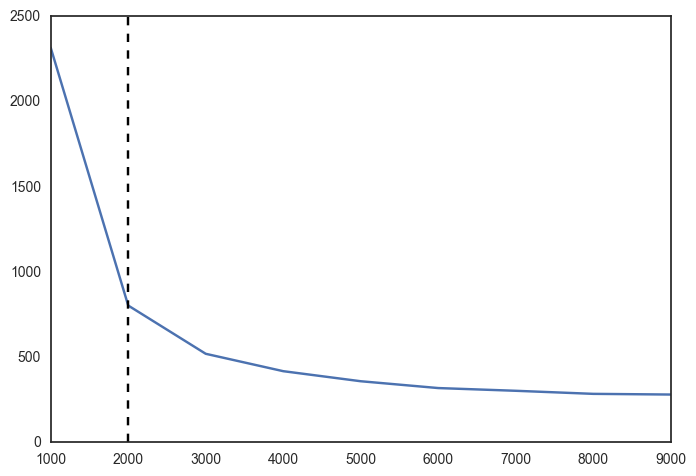

In [4]:
knee_point, _ = find_knee_point(X, Y, S)
draw_plot(X, Y, knee_point)